In [102]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [104]:
cr = pd.read_csv('ML_REVISED_V6_noyear_nounknowns.csv')

In [106]:
# group states into North, South, West & East
state_to_region = {
    'Rhodes Island': 'Northeast',
    'District of Columbia': 'Northeast',
    'Maine': 'Northeast', 
    'New Hampshire': 'Northeast', 
    'Vermont': 'Northeast', 
    'Massachusetts': 'Northeast', 
    'Rhode Island': 'Northeast', 
    'Connecticut': 'Northeast',
    'New York': 'Northeast', 
    'New Jersey': 'Northeast', 
    'Pennsylvania': 'Northeast',
    'Delaware': 'South', 
    'Maryland': 'South', 
    'Virginia': 'South', 
    'North Carolina': 'South',
    'South Carolina': 'South', 
    'Georgia': 'South', 
    'Florida': 'South', 
    'Alabama': 'South',
    'Mississippi': 'South', 
    'Louisiana': 'South', 
    'Arkansas': 'South', 
    'Tennessee': 'South',
    'Kentucky': 'South', 
    'West Virginia': 'South', 
    'Oklahoma': 'South', 
    'Texas': 'South',
    'Ohio': 'Midwest', 
    'Indiana': 'Midwest', 
    'Illinois': 'Midwest', 
    'Iowa': 'Midwest', 
    'Missouri': 'Midwest', 
    'Michigan': 'Midwest', 
    'Wisconsin': 'Midwest', 
    'Minnesota': 'Midwest',
    'North Dakota': 'Midwest', 
    'South Dakota': 'Midwest', 
    'Nebraska': 'Midwest', 
    'Kansas': 'Midwest',
    'Montana': 'West', 
    'Wyoming': 'West', 
    'Idaho': 'West', 
    'Washington': 'West', 
    'Oregon': 'West',
    'California': 'West', 
    'Nevada': 'West', 
    'Utah': 'West', 
    'Colorado': 'West', 
    'Arizona': 'West',
    'New Mexico': 'West', 
    'Alaska': 'West', 
    'Hawaii': 'West'
}

cr['Region'] = cr['State'].replace(state_to_region)

# Drop the 'State' column if you no longer need it
cr.drop('State', axis=1, inplace=True)

In [108]:
# Define a dictionary mapping months to seasons
month_to_season = {
    'January': 'Winter', 'February': 'Winter', 'December': 'Winter',
    'March': 'Spring', 'April': 'Spring', 'May': 'Spring',
    'June': 'Summer', 'July': 'Summer', 'August': 'Summer',
    'September': 'Autumn', 'October': 'Autumn', 'November': 'Autumn'
}

# Replace the 'Month' column with the corresponding 'Season'
cr['Season'] = cr['Month'].map(month_to_season)

# Optionally, you can drop the 'Month' column if you no longer need it
cr.drop('Month', axis=1, inplace=True)

# Check the result
#print(cr[['Month', 'Season']].head())

In [110]:
cr = pd.DataFrame(cr)

In [147]:
cr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153511 entries, 0 to 153510
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   Victim Sex             153511 non-null  object
 1   Victim Age             153511 non-null  int64 
 2   Victim Race            153511 non-null  object
 3   Victim Ethnicity       153511 non-null  object
 4   Perpetrator Sex        153511 non-null  object
 5   Perpetrator Race       153511 non-null  object
 6   Perpetrator Ethnicity  153511 non-null  object
 7   Relationship Category  153511 non-null  object
 8   Agency_Type_grouped    153511 non-null  object
 9   Weapon Category        153511 non-null  object
 10  Region                 153511 non-null  object
 11  Season                 153511 non-null  object
dtypes: int64(1), object(11)
memory usage: 14.1+ MB


In [112]:
# list features to convert to categorical
categ_features = ['Region','Season','Victim Sex','Victim Race','Victim Ethnicity','Perpetrator Sex','Perpetrator Race','Perpetrator Ethnicity','Relationship Category','Agency_Type_grouped']

# convert features to categorical (binary)
cr[categ_features] = cr[categ_features].astype('category')

In [99]:
# numerical features - just one:
## Victim Age

In [114]:
# target variable to convert to categorical
cr['Weapon Category'] = cr['Weapon Category'].astype('category')

In [116]:
# We could drop 'State' which is replaced by 'Region'
cr.drop(columns=['Victim Race','Perpetrator Race'],inplace=True)

In [118]:
# And update categ_features
categ_features = ['Region','Season','Victim Sex','Victim Ethnicity','Perpetrator Sex','Perpetrator Ethnicity','Relationship Category','Agency_Type_grouped']

In [120]:
# 1. Apply get_dummies to all categorical features
# Use get_dummies for all categorical features except for Victim Sex, Perpetrator Sex, Victim Ethnicity, and Perpetrator Ethnicity
non_sex_ethnicity_features = [col for col in categ_features if col not in ['Victim Sex', 'Perpetrator Sex', 'Victim Ethnicity', 'Perpetrator Ethnicity']]

# Apply get_dummies for these features
cr_non_sex_ethnicity = pd.get_dummies(cr[non_sex_ethnicity_features], drop_first=True)

# 2. Apply get_dummies separately for 'Victim Sex' and 'Perpetrator Sex'
victim_sex_dummies = pd.get_dummies(cr['Victim Sex'], prefix='Victim Sex', drop_first=True)
perpetrator_sex_dummies = pd.get_dummies(cr['Perpetrator Sex'], prefix='Perpetrator Sex', drop_first=True)

# 3. Apply get_dummies separately for 'Victim Ethnicity' and 'Perpetrator Ethnicity'
victim_ethnicity_dummies = pd.get_dummies(cr['Victim Ethnicity'], prefix='Victim Ethnicity', drop_first=True)
perpetrator_ethnicity_dummies = pd.get_dummies(cr['Perpetrator Ethnicity'], prefix='Perpetrator Ethnicity', drop_first=True)

# 4. Concatenate all the dummy variable DataFrames
cr = pd.concat([cr, cr_non_sex_ethnicity, victim_sex_dummies, perpetrator_sex_dummies, victim_ethnicity_dummies, perpetrator_ethnicity_dummies], axis=1)

# 5. Drop the original categorical columns after applying get_dummies
cr.drop(columns=['Victim Sex', 'Perpetrator Sex', 'Victim Ethnicity', 'Perpetrator Ethnicity', 'Season', 'Region', 'Relationship Category', 'Agency_Type_grouped'], inplace=True)

# Print the updated DataFrame to check
print(cr.head())


   Victim Age Weapon Category  Region_Northeast  Region_South  Region_West  \
0          26     Non-Firearm             False         False         True   
1          23         Firearm             False          True        False   
2          42         Firearm             False          True        False   
3          33         Firearm             False          True        False   
4          46         Firearm             False          True        False   

   Season_Spring  Season_Summer  Season_Winter  Relationship Category_Family  \
0          False          False          False                         False   
1          False           True          False                         False   
2          False           True          False                         False   
3          False           True          False                         False   
4          False          False          False                          True   

   Relationship Category_Lover  Relationship Categ

In [159]:
print(cr.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153511 entries, 0 to 153510
Data columns (total 17 columns):
 #   Column                              Non-Null Count   Dtype   
---  ------                              --------------   -----   
 0   Victim Age                          153511 non-null  int64   
 1   Weapon Category                     153511 non-null  category
 2   Region_Northeast                    153511 non-null  bool    
 3   Region_South                        153511 non-null  bool    
 4   Region_West                         153511 non-null  bool    
 5   Season_Spring                       153511 non-null  bool    
 6   Season_Summer                       153511 non-null  bool    
 7   Season_Winter                       153511 non-null  bool    
 8   Relationship Category_Family        153511 non-null  bool    
 9   Relationship Category_Lover         153511 non-null  bool    
 10  Relationship Category_Stranger      153511 non-null  bool    
 11  Agency_Type_g

In [122]:
# Prepare the final DataFrame for analysis
analysis_data = cr.copy()

In [124]:
# Check each feature for Complete Separation
categorical_columns = [col for col in analysis_data.columns if col != 'Victim Age' and col != 'Weapon Category']

for feature in categorical_columns:
    # Create a cross-tabulation of the feature and the target
    crosstab = pd.crosstab(analysis_data[feature], analysis_data['Weapon Category'])
    print(f"Cross-tabulation for {feature}:\n{crosstab}\n")

# Since none of the values in the cross-tabulations for the dummy variables are zero,
## it indicates that Complete Separation is not an issue in your dataset. This means 
## no feature perfectly predicts the target variable (Weapon Category), so we can 
## confidently proceed to the next step.

Cross-tabulation for Region_Northeast:
Weapon Category   Firearm  Non-Firearm
Region_Northeast                      
False               96231        44849
True                 6757         5674

Cross-tabulation for Region_South:
Weapon Category  Firearm  Non-Firearm
Region_South                         
False              51827        29500
True               51161        21023

Cross-tabulation for Region_West:
Weapon Category  Firearm  Non-Firearm
Region_West                          
False              66708        31595
True               36280        18928

Cross-tabulation for Season_Spring:
Weapon Category  Firearm  Non-Firearm
Season_Spring                        
False              77636        37946
True               25352        12577

Cross-tabulation for Season_Summer:
Weapon Category  Firearm  Non-Firearm
Season_Summer                        
False              75587        36830
True               27401        13693

Cross-tabulation for Season_Winter:
Weapon Category

In [126]:
# Check for Multicolinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Prepare the dataset for VIF calculation by removing the target variable
features_for_vif = analysis_data.drop(columns=['Weapon Category'])

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data['Feature'] = features_for_vif.columns
vif_data['VIF'] = [variance_inflation_factor(features_for_vif.values, i) for i in range(features_for_vif.shape[1])]

# Print VIF results
print(vif_data)

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

The error ufunc 'isfinite' not supported for the input types typically occurs when the input data contains non-numeric data or unexpected 
types that cannot be processed by the variance_inflation_factor function.

Likely Causes:
Unexpected Data Types: The dataset may still contain non-numeric columns or category dtypes that were not properly converted into numeric dummy variables.
Null or NaN Values: Missing values can cause this issue.
Incorrect Data Preparation: Some columns may have been inadvertently left in their original form.

These are explored below.

In [128]:
# Verify Data Types Ensure that all columns in features_for_vif are numerical.

print(features_for_vif.dtypes)

Victim Age                            int64
Region_Northeast                       bool
Region_South                           bool
Region_West                            bool
Season_Spring                          bool
Season_Summer                          bool
Season_Winter                          bool
Relationship Category_Family           bool
Relationship Category_Lover            bool
Relationship Category_Stranger         bool
Agency_Type_grouped_Other Police       bool
Agency_Type_grouped_Sheriff            bool
Victim Sex_Male                        bool
Perpetrator Sex_Male                   bool
Victim Ethnicity_Not Hispanic          bool
Perpetrator Ethnicity_Not Hispanic     bool
dtype: object


The bool data type for the dummy variables is the likely issue here. The variance_inflation_factor function expects all variables to be 
numeric (e.g., int64 or float64). While boolean data (bool) is conceptually numeric (0/1), it needs to be explicitly converted to integers or
floats for the VIF calculation.

In [130]:
# Convert all boolean columns to integers
features_for_vif = features_for_vif.astype(int)

# Recalculate VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data['Feature'] = features_for_vif.columns
vif_data['VIF'] = [variance_inflation_factor(features_for_vif.values, i) for i in range(features_for_vif.shape[1])]

print(vif_data)

                               Feature       VIF
0                           Victim Age  4.971222
1                     Region_Northeast  1.701861
2                         Region_South  4.982775
3                          Region_West  4.067879
4                        Season_Spring  1.928229
5                        Season_Summer  2.000574
6                        Season_Winter  1.913203
7         Relationship Category_Family  1.271483
8          Relationship Category_Lover  1.677801
9       Relationship Category_Stranger  1.696647
10    Agency_Type_grouped_Other Police  1.089284
11         Agency_Type_grouped_Sheriff  1.327870
12                     Victim Sex_Male  4.292957
13                Perpetrator Sex_Male  6.978532
14       Victim Ethnicity_Not Hispanic  9.401322
15  Perpetrator Ethnicity_Not Hispanic  9.432092


Interpreting VIF Results
 -> VIF < 5: Low multicollinearity; the feature is fine.
 -> 5 ≤ VIF < 10: Moderate multicollinearity; watch closely.
 -> VIF ≥ 10: High multicollinearity; consider addressing this feature.

If high VIF values are detected:
- Remove or combine correlated features.
- Use dimensionality reduction techniques like PCA.
- Regularization techniques (e.g., Lasso Regression) can mitigate multicollinearity.

Reasons to Scale a Single Numerical Variable:
- Improves Numerical Stability:
Logistic regression and other algorithms compute values like gradients, and large differences in scale between variables (e.g., age vs. dummy variables) can lead to numerical instability.
Scaling reduces these issues.
- Consistency:
If you plan to compare the numerical variable with categorical dummy variables, scaling ensures that all features have comparable ranges, which is particularly helpful for regularization techniques (e.g., L1/L2 penalties in logistic regression).
- Interpretation in Coefficients:
For scaled numerical features, coefficients can be interpreted in terms of standard deviations rather than raw units. This provides a more intuitive understanding in models like logistic regression.
- Compatibility:
Some machine learning models (e.g., SVMs, K-Means, and neural networks) require features to be scaled for optimal performance, even if 
there’s only one numerical variable.
While scaling isn’t strictly necessary for some models (like decision trees), it’s generally a good habit for preprocessing, especially if 
you might experiment with multiple models.

In [132]:
# Start by scaling Victim Age (with mean 0 and variance 1)
from sklearn.preprocessing import StandardScaler

# Create a scaler instance
scaler = StandardScaler()

# Scale Victim Age
analysis_data['Victim Age Scaled'] = scaler.fit_transform(analysis_data[['Victim Age']])

# Drop the original 'age' column
analysis_data.drop(columns=['Victim Age'], inplace=True)

# Check the updated DataFrame
print(analysis_data.head())

  Weapon Category  Region_Northeast  Region_South  Region_West  Season_Spring  \
0     Non-Firearm             False         False         True          False   
1         Firearm             False          True        False          False   
2         Firearm             False          True        False          False   
3         Firearm             False          True        False          False   
4         Firearm             False          True        False          False   

   Season_Summer  Season_Winter  Relationship Category_Family  \
0          False          False                         False   
1           True          False                         False   
2           True          False                         False   
3           True          False                         False   
4          False          False                          True   

   Relationship Category_Lover  Relationship Category_Stranger  \
0                         True                          

In [134]:
# Recalculate the VIF after scaling the Victim Age

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Recalculate VIF for all features (including the scaled age variable)
features_for_vif = analysis_data.drop(columns=['Weapon Category'])  # Exclude target variable

# Convert all boolean columns to integers
features_for_vif = features_for_vif.astype(int)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data['Feature'] = features_for_vif.columns
vif_data['VIF'] = [variance_inflation_factor(features_for_vif.values, i) for i in range(features_for_vif.shape[1])]

# Print VIF results
print(vif_data)


                               Feature       VIF
0                     Region_Northeast  1.674179
1                         Region_South  4.841236
2                          Region_West  3.945659
3                        Season_Spring  1.921599
4                        Season_Summer  1.993639
5                        Season_Winter  1.906969
6         Relationship Category_Family  1.266420
7          Relationship Category_Lover  1.612763
8       Relationship Category_Stranger  1.694186
9     Agency_Type_grouped_Other Police  1.089270
10         Agency_Type_grouped_Sheriff  1.325144
11                     Victim Sex_Male  4.234758
12                Perpetrator Sex_Male  6.740294
13       Victim Ethnicity_Not Hispanic  9.311430
14  Perpetrator Ethnicity_Not Hispanic  9.403482
15                   Victim Age Scaled  1.050158


In [136]:
# Calculate correlation for all dummy variables

# Remove numerical columns (e.g., 'Victim Age Scaled') from the correlation matrix
dummy_variables = features_for_vif.drop(columns=['Victim Age Scaled'])

# Calculate the correlation matrix for dummy variables
correlation_matrix_dummies = dummy_variables.corr()

# Display the correlation matrix for dummy variables
print(correlation_matrix_dummies)

                                    Region_Northeast  Region_South  \
Region_Northeast                            1.000000     -0.279656   
Region_South                               -0.279656      1.000000   
Region_West                                -0.222453     -0.706026   
Season_Spring                              -0.005061      0.004993   
Season_Summer                               0.005193      0.000199   
Season_Winter                              -0.001976      0.002782   
Relationship Category_Family                0.006950      0.009092   
Relationship Category_Lover                 0.016732      0.010288   
Relationship Category_Stranger             -0.020285     -0.119498   
Agency_Type_grouped_Other Police            0.134319      0.048370   
Agency_Type_grouped_Sheriff                -0.134647      0.102095   
Victim Sex_Male                            -0.031356      0.027103   
Perpetrator Sex_Male                        0.000171     -0.046898   
Victim Ethnicity_Not

In [138]:
# Check the correlation of 'Victim Age Scaled' with each dummy variable
age_correlation = features_for_vif[['Victim Age Scaled'] + list(dummy_variables.columns)].corr()

# Display the correlation values
print(age_correlation)


                                    Victim Age Scaled  Region_Northeast  \
Victim Age Scaled                            1.000000          0.013418   
Region_Northeast                             0.013418          1.000000   
Region_South                                 0.012031         -0.279656   
Region_West                                 -0.016337         -0.222453   
Season_Spring                                0.002535         -0.005061   
Season_Summer                               -0.002973          0.005193   
Season_Winter                                0.000847         -0.001976   
Relationship Category_Family                -0.017561          0.006950   
Relationship Category_Lover                  0.063528          0.016732   
Relationship Category_Stranger              -0.002057         -0.020285   
Agency_Type_grouped_Other Police             0.004368          0.134319   
Agency_Type_grouped_Sheriff                  0.037618         -0.134647   
Victim Sex_Male          

From the above correlation matrices we note that perpetrator sex male, despite having a moderate VIF, it is not correlated with any of the 
other feature categorical including Victim Sex_Male and Victim Age the only numerical variable we have. On the other hand, there is a high 
correlation between:
1. Victim Ethnicity_Not Hispanic
2.Perpetrator Ethnicity_Not Hispanic

In [140]:
# Map 'Firearm' to 1 and 'Non-Firearm' to 0
analysis_data['Weapon Category'] = analysis_data['Weapon Category'].map({'Firearm': 1, 'Non-Firearm': 0})

In [150]:
# Combine the two ethnicity columns into a new binary feature
## we do this do to their high correlation (0.73) and high VIF (9.31 and 9.40, respectively)
analysis_data['Ethnicity_Not_Hispanic_Combined'] = (
    (analysis_data['Victim Ethnicity_Not Hispanic'] == 1) | 
    (analysis_data['Perpetrator Ethnicity_Not Hispanic'] == 1)
).astype(int)

# Drop the original ethnicity columns
analysis_data.drop(columns=['Victim Ethnicity_Not Hispanic', 'Perpetrator Ethnicity_Not Hispanic'], inplace=True)


In [152]:
# Check the distribution of the combined variable
print(analysis_data['Ethnicity_Not_Hispanic_Combined'].value_counts())

Ethnicity_Not_Hispanic_Combined
1    126444
0     27067
Name: count, dtype: int64


In [154]:
# Recalculate the VIF after scaling the Victim Age

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Recalculate VIF for all features (including the scaled age variable)
features_for_vif = analysis_data.drop(columns=['Weapon Category'])  # Exclude target variable

# Convert all boolean columns to integers
features_for_vif = features_for_vif.astype(int)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data['Feature'] = features_for_vif.columns
vif_data['VIF'] = [variance_inflation_factor(features_for_vif.values, i) 
                   for i in range(features_for_vif.shape[1])]

# Print VIF results
print(vif_data)

                             Feature       VIF
0                   Region_Northeast  1.678170
1                       Region_South  4.862534
2                        Region_West  3.963891
3                      Season_Spring  1.921095
4                      Season_Summer  1.993151
5                      Season_Winter  1.906229
6       Relationship Category_Family  1.260521
7        Relationship Category_Lover  1.605990
8     Relationship Category_Stranger  1.695476
9   Agency_Type_grouped_Other Police  1.088329
10       Agency_Type_grouped_Sheriff  1.323995
11                   Victim Sex_Male  4.242419
12              Perpetrator Sex_Male  6.762736
13                 Victim Age Scaled  1.049026
14   Ethnicity_Not_Hispanic_Combined  4.842578


In [156]:
# Check correlation matrix

# Check the correlation matrix again
correlation_matrix = features_for_vif.corr()

# Display the correlations
print(correlation_matrix)

                                  Region_Northeast  Region_South  Region_West  \
Region_Northeast                          1.000000     -0.279656    -0.222453   
Region_South                             -0.279656      1.000000    -0.706026   
Region_West                              -0.222453     -0.706026     1.000000   
Season_Spring                            -0.005061      0.004993     0.002876   
Season_Summer                             0.005193      0.000199    -0.004993   
Season_Winter                            -0.001976      0.002782    -0.003193   
Relationship Category_Family              0.006950      0.009092    -0.018856   
Relationship Category_Lover               0.016732      0.010288    -0.029029   
Relationship Category_Stranger           -0.020285     -0.119498     0.156537   
Agency_Type_grouped_Other Police          0.134319      0.048370    -0.117901   
Agency_Type_grouped_Sheriff              -0.134647      0.102095     0.000690   
Victim Sex_Male             

To note is the negative correlation of -0.71 between Region_South and Region_West. However, given that their VIF is below 5, I am not 
combining them or dropping one.

I was tempted to combine them in one feature, South-West. But I am afraid that given their negative correlation, such combination might not 
make sense. Essentially, I will be combining two features which are negatively correlated. Combining features that are negatively 
correlated could potentially obscure the relationship between those regions and the target variable, leading to a loss in model 
interpretability.
For similar reasons, droppoing one of the regions makes no sense either.

In [158]:
# Prepare data for analysis confirming that all features and target variable are of the appropriate type.
print(analysis_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153511 entries, 0 to 153510
Data columns (total 16 columns):
 #   Column                            Non-Null Count   Dtype   
---  ------                            --------------   -----   
 0   Weapon Category                   153511 non-null  category
 1   Region_Northeast                  153511 non-null  bool    
 2   Region_South                      153511 non-null  bool    
 3   Region_West                       153511 non-null  bool    
 4   Season_Spring                     153511 non-null  bool    
 5   Season_Summer                     153511 non-null  bool    
 6   Season_Winter                     153511 non-null  bool    
 7   Relationship Category_Family      153511 non-null  bool    
 8   Relationship Category_Lover       153511 non-null  bool    
 9   Relationship Category_Stranger    153511 non-null  bool    
 10  Agency_Type_grouped_Other Police  153511 non-null  bool    
 11  Agency_Type_grouped_Sheriff       15351

In [160]:
features_for_vif

,Region_Northeast,Region_South,Region_West,Season_Spring,Season_Summer,Season_Winter,Relationship Category_Family,Relationship Category_Lover,Relationship Category_Stranger,Agency_Type_grouped_Other Police,Agency_Type_grouped_Sheriff,Victim Sex_Male,Perpetrator Sex_Male,Victim Age Scaled,Ethnicity_Not_Hispanic_Combined
0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,1
1,0,1,0,0,1,0,0,0,0,0,1,1,1,0,1
2,0,1,0,0,1,0,0,1,0,0,1,1,0,0,1
3,0,1,0,0,1,0,0,0,0,0,1,1,1,0,1
4,0,1,0,0,0,0,1,0,0,0,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153506,0,0,1,0,0,0,1,0,0,0,0,1,1,0,1
153507,0,0,1,0,0,1,0,0,0,0,1,1,1,0,1
153508,0,0,1,0,1,0,0,1,0,0,1,0,1,1,1
153509,0,0,1,0,0,0,1,0,0,0,1,0,1,2,1


In [162]:
# Check the distribution of the combined variable
print(analysis_data['Weapon Category'].value_counts())

Weapon Category
1    102988
0     50523
Name: count, dtype: int64


In [164]:
# Combine Victim Age Scaled to the other categorical features and include the feature variables in X and the target variable in y

# Assuming 'Victim Age Scaled' is a separate column, add it to features_for_vif
features_for_vif['Victim Age Scaled'] = analysis_data['Victim Age Scaled']

# Define X and y
X = features_for_vif  # Now includes all features and scaled Victim Age
y = analysis_data['Weapon Category']  # Target variable

In [166]:
from sklearn.model_selection import train_test_split

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [168]:
# Logistic regression model

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Initialize the logistic regression model
model = LogisticRegression(max_iter=1000)

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Display classification report
print(classification_report(y_test, y_pred))

Accuracy: 0.6825900030399097
              precision    recall  f1-score   support

           0       0.57      0.15      0.24     15196
           1       0.69      0.95      0.80     30858

    accuracy                           0.68     46054
   macro avg       0.63      0.55      0.52     46054
weighted avg       0.65      0.68      0.61     46054



In [176]:
# confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[ 2250, 12946],
       [ 1672, 29186]])

In [178]:
# Check coefficients

# Display the coefficients of the logistic regression model
print(f"Model coefficients: {model.coef_}")

Model coefficients: [[-0.41852742  0.29028537 -0.03130992 -0.00426956 -0.01390981  0.05097992
  -0.25801422  0.50971021  0.58421546  0.27972029  0.30711918  0.68111377
   0.68163662 -0.19282739  0.09291633]]


In [180]:
# Get the feature importance (coefficients) from the logistic regression model

# Get feature names (assuming X_train is the training set you used)
feature_names = X_train.columns

# Get coefficients of the model
coefficients = model.coef_[0]

# Create a DataFrame for better readability
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients,
    'Absolute Coefficient': abs(coefficients)
})

# Sort the features based on absolute coefficient values (importance)
feature_importance = feature_importance.sort_values(by='Absolute Coefficient', ascending=False)

# Display the sorted feature importance
print(feature_importance)


                             Feature  Coefficient  Absolute Coefficient
12              Perpetrator Sex_Male     0.681637              0.681637
11                   Victim Sex_Male     0.681114              0.681114
8     Relationship Category_Stranger     0.584215              0.584215
7        Relationship Category_Lover     0.509710              0.509710
0                   Region_Northeast    -0.418527              0.418527
10       Agency_Type_grouped_Sheriff     0.307119              0.307119
1                       Region_South     0.290285              0.290285
9   Agency_Type_grouped_Other Police     0.279720              0.279720
6       Relationship Category_Family    -0.258014              0.258014
13                 Victim Age Scaled    -0.192827              0.192827
14   Ethnicity_Not_Hispanic_Combined     0.092916              0.092916
5                      Season_Winter     0.050980              0.050980
2                        Region_West    -0.031310              0

In [ ]:
# Interpretation of Coefficients:
## Positive Coefficients: A positive coefficient means that as the feature increases, the likelihood of the target variable being 1 (e.g., a 
### certain category in the classification) also increases.
## Negative Coefficients: A negative coefficient means that as the feature increases, the likelihood of the target variable being 0 (e.g., 
### the opposite category) increases.

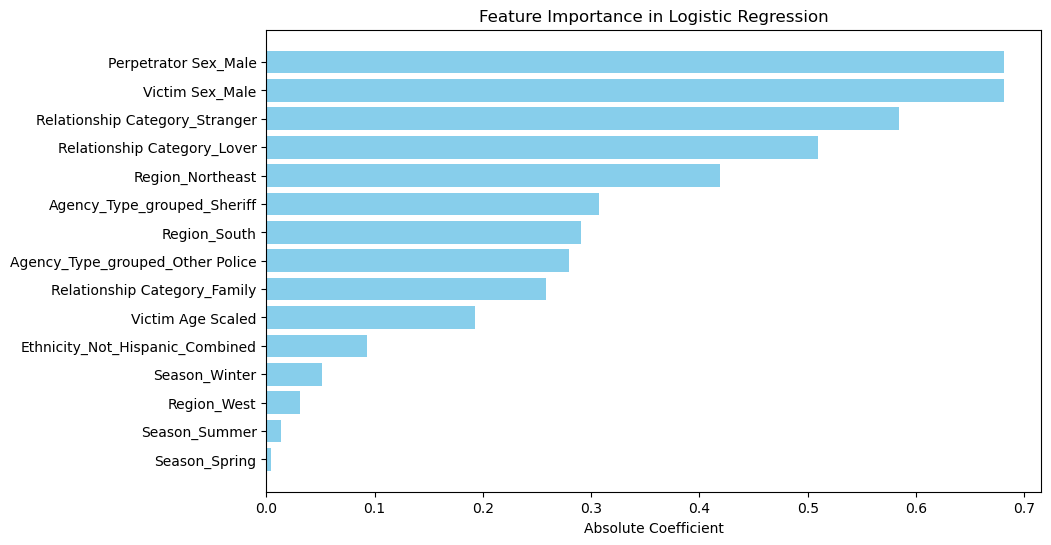

In [182]:
import matplotlib.pyplot as plt

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Absolute Coefficient'], color='skyblue')
plt.xlabel('Absolute Coefficient')
plt.title('Feature Importance in Logistic Regression')
plt.gca().invert_yaxis()  # To show the most important feature at the top
plt.show()

In [184]:
import statsmodels.api as sm
import numpy as np

# Add a constant to the features for the intercept term (required for statsmodels)
X_train_with_intercept = sm.add_constant(X_train)

# Fit the logistic regression model using statsmodels
logit_model = sm.Logit(y_train, X_train_with_intercept)
result = logit_model.fit()

# Get the summary of the model, including p-values and other stats
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.602337
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:        Weapon Category   No. Observations:               107457
Model:                          Logit   Df Residuals:                   107441
Method:                           MLE   Df Model:                           15
Date:                Tue, 10 Dec 2024   Pseudo R-squ.:                 0.04888
Time:                        18:21:42   Log-Likelihood:                -64725.
converged:                       True   LL-Null:                       -68052.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                               -0.8353      0.043    -19.59

Model Interpretation:

Pseudo R-squared (0.04888): This indicates that the model explains approximately 4.89% of the variance in the outcome, which is relatively
low. This is typical for binary classification models, as not all influencing factors are captured by the features.
Log-Likelihood (-64725): This is a measure of model fit. A significant LLR p-value of 0.000 suggests that the model is a better fit than 
the null model (which only includes the intercept).

Coefficients and their interpretation
Intercept: Interpretation: The intercept represents the baseline log-odds of having a Firearm in the absence of other predictors. A 
negative value suggests that, for the reference categories (i.e., the baseline values for categorical features), the odds of having a 
Firearm are lower compared to not having one.

Region_Northeast (-0.4188): Being in the Northeast region reduces the odds of having a Firearm as the weapon compared to other regions.
Region_South (0.2906): Being in the South region increases the odds of having a Firearm compared to other regions.
Region_West (-0.0311): Being in the West region has a minimal effect (the p-value is not significant, suggesting it may not contribute 
meaningfully to predicting whether a weapon is a Firearm or not).

Season_Spring (-0.0057): Spring shows no significant effect on whether the weapon is a Firearm or not (p-value = 0.766).
Season_Summer (-0.0153): Summer also shows no significant effect (p-value = 0.415)
Season_Winter (0.0496): Winter increases the odds of the weapon being a Firearm compared to the baseline season (likely Fall), with a 
statistically significant effect (p-value = 0.010).

Relationship Category_Family (-0.2544): Being a Family member decreases the odds of a Firearm being involved in the incident (p-value = 0).
Relationship Category_Lover (0.5123): Being a Lover increases the odds of a Firearm being involved. This is a significant relationship 
with a high coefficient (p-value = 0).
Relationship Category_Stranger (0.5864): A Stranger relationship is the most strongly associated with the weapon being a Firearm. This 
suggests that firearm-related incidents are more common when the relationship is stranger-based (p-value = 0).

Agency_Type_grouped_Other Police (0.2799): This indicates that incidents handled by Other Police agencies are more likely to involve a 
Firearm compared to incidents handled by the reference agency.
Agency_Type_grouped_Sheriff (0.3066): Similar to the above, incidents involving Sheriff agencies are more likely to involve a Firearm.

Victim Sex_Male (0.6826): Male victims are much more likely to be involved in incidents where the weapon is a Firearm compared to female 
victims.
Perpetrator Sex_Male (0.6808): Male perpetrators are strongly associated with incidents involving a Firearm, much like male victims.

Victim Age Scaled (-0.1925): As victim age increases, the likelihood of the weapon being a Firearm decreases. This suggests that older 
victims are less likely to be involved in firearm-related incidents.

Individuals who are not Hispanic have slightly higher odds of being involved in firearm-related incidents compared to Hispanic individuals. 
The effect is small but statistically significant.


Statistical significance

Most features have very low p-values (< 0.05), indicating strong statistical significance. These include variables like Victim Sex, 
Perpetrator Sex, Relationship Category, and Agency Type, all of which play a significant role in predicting the likelihood that the 
weapon is a Firearm.

Model interpretability and insights

Significant predictors: The most influential features are related to sex (both victim and perpetrator), relationship category, and agency 
type. Male victims and perpetrators, as well as incidents involving strangers or lovers, are more likely to involve firearms.

Age and ethnicity: Older victims and individuals who are not Hispanic have slightly different odds of being involved in firearm-related 
incidents.

Regional influences: The South region has a significant positive effect on the likelihood of the weapon being a Firearm, while the 
Northeast region has a negative effect.

Conclusion

Model Performance: Given the statistically significant features, the model is useful for predicting whether a weapon is a Firearm or not 
based on the selected features. However, you might want to evaluate predictive metrics like accuracy, ROC curves, and AUC scores to 
further assess model performance.

Interpretability: The coefficients are fairly interpretable, and you can easily communicate how different factors, such as the sex of the 
victim and perpetrator or the relationship type, influence the likelihood of a firearm being involved in an incident.

In [186]:
# Fit a null model with just an intercept (no predictors)
null_model = sm.Logit(y_train, np.ones((X_train.shape[0], 1)))  # Only an intercept, no features
null_result = null_model.fit()

# Log-Likelihood of the null model
log_likelihood_null = null_result.llf

# Deviance calculation
deviance = -2 * (result.llf - log_likelihood_null)

print(f"Deviance: {deviance}")

# the below result are to be interpreted as follows:
## The deviance of the full model (-6652.92) suggests that the model is likely providing a significantly better fit compared to the null model.
## The null model is a logistic regression model that only includes an intercept and no predictors (features). This model essentially assumes
### that the probability of the target variable (Weapon Category) being 1 (Firearm) is the same for all observations, without considering any
### other features.

Optimization terminated successfully.
         Current function value: 0.633293
         Iterations 4
Deviance: -6652.915155824274


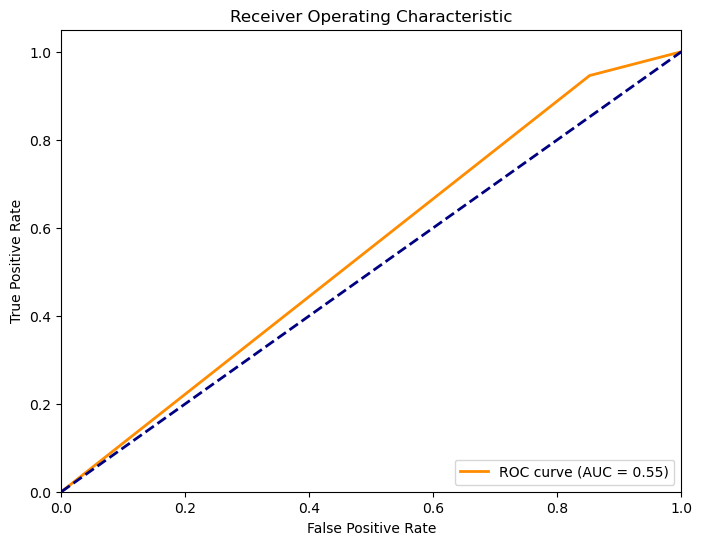

AUC Score: 0.5469408001269851


In [188]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Print AUC score
print(f"AUC Score: {roc_auc}")

# Interpratation of below results:
## ROC Curve: The orange curve represents the true positive rate (sensitivity) against the false positive rate (1 - specificity) across 
### various thresholds. Ideally, we want the curve to be as close to the top-left corner as possible, as this would indicate good performance 
### in both identifying the positive class (Firearm) and minimizing false positives (misclassifying Not Firearm as Firearm).
## AUC Score: The AUC score is 0.55, which is slightly above random guessing (AUC = 0.5). This suggests that the model has some ability to 
### discriminate between the classes but is not performing well. Typically, an AUC above 0.7 would be considered a good model, and values 
### below 0.6 indicate room for improvement.

# Key Points:
## The curve is very close to the diagonal line (dashed blue line), which represents random guessing. This suggests that the model is not 
### discriminating very well between the "Firearm" and "Not Firearm" categories.
## The AUC of 0.55 suggests that the model's predictive power is weak. It means that, while the model has some predictive capability, it is 
### not much better than a random classifier.

# Next steps:
## Model Improvements: You could experiment with feature engineering, adding or transforming features, and testing other machine learning 
### models (e.g., decision trees, random forests, XGBoost) to improve performance.
## Class Imbalance Handling: Techniques such as oversampling the minority class (e.g., SMOTE) or undersampling the majority class could help 
### the model better learn to classify the minority class.
## Hyperparameter Tuning: You could fine-tune the hyperparameters of the logistic regression model (e.g., regularization strength) to improve
### its performance. These include Lasso and Ridge Regression.

In [190]:
# Trying regularization techniques - Lasso & Ridge Regression

from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, accuracy_score

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Lasso (L1) regularization
lasso_model = LogisticRegressionCV(
    penalty='l1',  # Lasso (L1 regularization)
    solver='saga', # Solver that supports L1 regularization
    cv=5,  # 5-fold cross-validation
    random_state=42
)

# Fit the lasso model
lasso_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = lasso_model.predict(X_test)
y_pred_prob = lasso_model.predict_proba(X_test)[:, 1]  # Probability for ROC/AUC

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_prob)

print(f"Lasso Model - Accuracy: {accuracy:.4f}, AUC: {auc:.4f}")

# Ridge (L2) regularization
ridge_model = LogisticRegressionCV(
    penalty='l2',  # Ridge (L2 regularization)
    solver='lbfgs', # Solver for L2 regularization
    cv=5,  # 5-fold cross-validation
    random_state=42
)

# Fit the ridge model
ridge_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_ridge = ridge_model.predict(X_test)
y_pred_prob_ridge = ridge_model.predict_proba(X_test)[:, 1]  # Probability for ROC/AUC

# Evaluate the model
accuracy_ridge = accuracy_score(y_test, y_pred_ridge)
auc_ridge = roc_auc_score(y_test, y_pred_prob_ridge)

print(f"Ridge Model - Accuracy: {accuracy_ridge:.4f}, AUC: {auc_ridge:.4f}")

Lasso Model - Accuracy: 0.6825, AUC: 0.6468
Ridge Model - Accuracy: 0.6826, AUC: 0.6469


Interpretation of Lasso and Ridge Models:

Accuracy:
Both models (Lasso and Ridge) have similar accuracy scores, which are around 68.25% and 68.26%, respectively. This indicates that both 
models perform similarly in terms of the overall percentage of correct classifications, which is decent but may be indicative of room for
improvement, especially given the class imbalance (firearm vs. non-firearm).

AUC (Area Under the ROC Curve):
Both models have AUC values around 0.65, which suggests that the models are only slightly better than random guessing (AUC = 0.5 is 
random chance). Since AUC is a better metric when the dataset is imbalanced, a value of 0.65 indicates that the models are reasonably 
distinguishing between the two classes, but there’s still significant room for improvement.

Results from the Lasso Model and Ridge Regression are slightly better than the results of the Logistic Regression

Why 5-Fold Cross-Validation?
Balance Between Computational Efficiency and Robustness:
Fewer Folds (e.g., 3): Faster but less robust, as it evaluates the model on fewer data partitions.
More Folds (e.g., 10): More robust but computationally expensive, especially for large datasets.

5-Fold: A good balance—reasonably robust while not overly time-consuming.
Widely Used in Practice:
5-fold cross-validation is a common default in machine learning and statistics because it often provides a reliable estimate of model 
performance without excessive computation.

Sufficient Data Representation:
With 5 folds, each fold uses 80% of the data for training and 20% for validation, ensuring that every data point is used for both training
and validation at least once. This improves the reliability of performance metrics.

Dataset Size Considerations:
Your dataset is large (around 107,000 observations for training). This size allows 5 folds to provide adequate training and validation 
partitions without underrepresenting any part of the data.

In [192]:
from sklearn.metrics import classification_report, confusion_matrix

# Predict on test set for Lasso
lasso_predictions = lasso_model.predict(X_test)
lasso_probabilities = lasso_model.predict_proba(X_test)[:, 1]

# Classification report and confusion matrix for Lasso
lasso_report = classification_report(y_test, lasso_predictions)
lasso_conf_matrix = confusion_matrix(y_test, lasso_predictions)

print("Lasso Classification Report:")
print(lasso_report)

print("Lasso Confusion Matrix:")
print(lasso_conf_matrix)

# Predict on test set for Ridge
ridge_predictions = ridge_model.predict(X_test)
ridge_probabilities = ridge_model.predict_proba(X_test)[:, 1]

# Classification report and confusion matrix for Ridge
ridge_report = classification_report(y_test, ridge_predictions)
ridge_conf_matrix = confusion_matrix(y_test, ridge_predictions)

print("\nRidge Classification Report:")
print(ridge_report)

print("Ridge Confusion Matrix:")
print(ridge_conf_matrix)


Lasso Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.15      0.24     15196
           1       0.69      0.95      0.80     30858

    accuracy                           0.68     46054
   macro avg       0.63      0.55      0.52     46054
weighted avg       0.65      0.68      0.61     46054

Lasso Confusion Matrix:
[[ 2249 12947]
 [ 1676 29182]]

Ridge Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.15      0.23     15196
           1       0.69      0.95      0.80     30858

    accuracy                           0.68     46054
   macro avg       0.63      0.55      0.52     46054
weighted avg       0.65      0.68      0.61     46054

Ridge Confusion Matrix:
[[ 2206 12990]
 [ 1627 29231]]


Key Metrics Analysis
Lasso and Ridge

Precision:
For class 0 (Not Firearm): 0.57 (Lasso) and 0.58 (Ridge). This indicates that about 57-58% of the predicted "Not Firearm" instances are correct. This low precision suggests a high false-positive rate for this class.
For class 1 (Firearm): 0.69 (both models). This is better, showing that 69% of predicted "Firearm" instances are correct.
Recall:
For class 0: 0.15 (both models). This indicates poor sensitivity for detecting the "Not Firearm" class, as only 15% of actual "Not Firearm" cases are identified correctly.
For class 1: 0.95 (both models). This is very high, meaning almost all actual "Firearm" cases are correctly identified.
F1-Score:
For class 0: 0.23 (both models). This low score reflects the trade-off between poor precision and recall for the "Not Firearm" class.
For class 1: 0.80 (both models). This high score shows a good balance of precision and recall for detecting "Firearm" cases.
Accuracy: 0.68 for both models. This metric reflects the overall performance but is influenced by the imbalance in the dataset.
Macro Average:
The macro average (averaging metrics across classes) shows that the model performs poorly on class 0, dragging down the overall balance.
Weighted Average:
The weighted average accounts for class imbalance and gives a better representation of overall performance. The F1-score of 0.61 reflects the stronger performance on class 1 compared to class 0.
Confusion Matrix

Lasso:
True Negatives (correctly identified 0): 2249.
False Positives (misclassified as 1): 12947.
False Negatives (misclassified as 0): 1676.
True Positives (correctly identified 1): 29182.
Ridge: Very similar results:
True Negatives: 2206.
False Positives: 12990.
False Negatives: 1627.
True Positives: 29231.
Interpretation
Model Bias:
Both models are biased towards predicting class 1 ("Firearm"). This bias is reflected in the much higher recall and precision for class 1 compared to class 0.
Class Imbalance:
The imbalance in the dataset (approximately 2:1 in favor of class 1) heavily influences the performance. This explains the poor performance for class 0.
Recommendation:
While the high recall for class 1 is desirable, the poor recall and precision for class 0 indicate that the model struggles to identify "Not Firearm" cases.
Consider resampling techniques (e.g., SMOTE or undersampling) or adjusting the class weights in the logistic regression model to handle the imbalance.

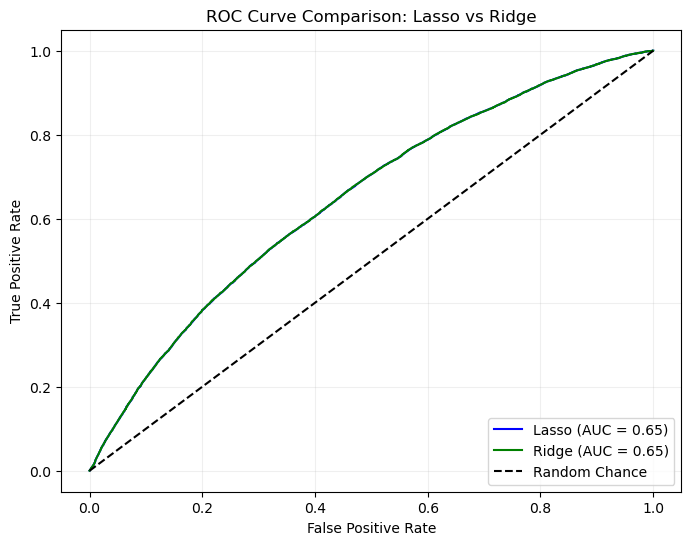

In [194]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Assuming lasso_model and ridge_model are already fitted

# Compute predicted probabilities for Lasso and Ridge models
lasso_probs = lasso_model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class
ridge_probs = ridge_model.predict_proba(X_test)[:, 1]

# Compute ROC curves
lasso_fpr, lasso_tpr, _ = roc_curve(y_test, lasso_probs)
ridge_fpr, ridge_tpr, _ = roc_curve(y_test, ridge_probs)

# Compute AUC scores
lasso_auc = roc_auc_score(y_test, lasso_probs)
ridge_auc = roc_auc_score(y_test, ridge_probs)

# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(lasso_fpr, lasso_tpr, label=f'Lasso (AUC = {lasso_auc:.2f})', color='blue')
plt.plot(ridge_fpr, ridge_tpr, label=f'Ridge (AUC = {ridge_auc:.2f})', color='green')

# Add a baseline
plt.plot([0, 1], [0, 1], linestyle='--', color='black', label='Random Chance')

# Customize plot
plt.title('ROC Curve Comparison: Lasso vs Ridge')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(alpha=0.2)
plt.show()


In [196]:
# Retrieve coefficients and intercept for ridge regression
ridge_coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': ridge_model.coef_[0]  # Coefficients for Ridge
}).sort_values(by='Coefficient', ascending=False)

# Display coefficients
print(ridge_coefficients)

# Intercept
print("Intercept:", ridge_model.intercept_[0])


                             Feature  Coefficient
11                   Victim Sex_Male     0.671481
12              Perpetrator Sex_Male     0.665548
8     Relationship Category_Stranger     0.580695
7        Relationship Category_Lover     0.496925
10       Agency_Type_grouped_Sheriff     0.303679
1                       Region_South     0.283042
9   Agency_Type_grouped_Other Police     0.271737
14   Ethnicity_Not_Hispanic_Combined     0.088308
5                      Season_Winter     0.046774
3                      Season_Spring    -0.008162
4                      Season_Summer    -0.017908
2                        Region_West    -0.037250
13                 Victim Age Scaled    -0.191861
6       Relationship Category_Family    -0.257477
0                   Region_Northeast    -0.420505
Intercept: -0.7968904513450379


In [198]:
# Retrieve coefficients and intercept for Lasso
lasso_coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lasso_model.coef_[0]  # Coefficients for Lasso
}).sort_values(by='Coefficient', ascending=False)

# Display coefficients
print(lasso_coefficients)

# Intercept
print("Intercept:", lasso_model.intercept_[0])

                             Feature  Coefficient
11                   Victim Sex_Male     0.682543
12              Perpetrator Sex_Male     0.680819
8     Relationship Category_Stranger     0.586392
7        Relationship Category_Lover     0.512219
10       Agency_Type_grouped_Sheriff     0.306571
1                       Region_South     0.290625
9   Agency_Type_grouped_Other Police     0.279770
14   Ethnicity_Not_Hispanic_Combined     0.092401
5                      Season_Winter     0.049620
3                      Season_Spring    -0.005647
4                      Season_Summer    -0.015295
2                        Region_West    -0.031033
13                 Victim Age Scaled    -0.192503
6       Relationship Category_Family    -0.254384
0                   Region_Northeast    -0.418751
Intercept: -0.8352923824305647


In [200]:
print("Optimal C values:", lasso_model.C_) # The optimal high C value implies that none of the features were reduced to 0.

Optimal C values: [21.5443469]


Interpretation of High C:
1. Low Regularization Effect:
A high C value means the model prioritizes fitting the data well over penalizing large coefficients.
This can result in keeping all features since the penalty applied to coefficients is minimal.
2. Potential Overfitting:
While a high C can lead to better performance on the training data, it might reduce generalizability to unseen data.
3. Significant Contributions from All Features:
The model likely found that all features contribute meaningfully to predicting the target, even if their individual influence is small.

In [202]:
# SMOTE

## SMOTE is a better alternative to avoid losing data, but it can introduce noise and might be computationally expensive.

# Step 1: Import necessary libraries

from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix

In [204]:
# Step 2: Apply SMOTE to the Training Data

# Apply SMOTE to oversample the minority class
smote = SMOTE(sampling_strategy='auto')  # 'auto' means balance the minority class with the majority class
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [205]:
# Step 3: Train the logistic regression model

# Train the logistic regression model on the resampled data
model = LogisticRegression(max_iter=1000)  # Increase max_iter if convergence issues occur
model.fit(X_resampled, y_resampled)

LogisticRegression(max_iter=1000)

In [208]:
# Step 4: Evaluate the model

# Predict on the test data
y_pred = model.predict(X_test)

# Accuracy
print("Accuracy: ", accuracy_score(y_test, y_pred))

# AUC Score
print("AUC: ", roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))  # Use predict_proba for AUC

# Classification report (Precision, Recall, F1-Score)
print(classification_report(y_test, y_pred))

# Confusion matrix
print(confusion_matrix(y_test, y_pred))

Accuracy:  0.6140400399530985
AUC:  0.6465823339564016
              precision    recall  f1-score   support

           0       0.44      0.57      0.49     15196
           1       0.75      0.63      0.69     30858

    accuracy                           0.61     46054
   macro avg       0.59      0.60      0.59     46054
weighted avg       0.65      0.61      0.62     46054

[[ 8694  6502]
 [11273 19585]]


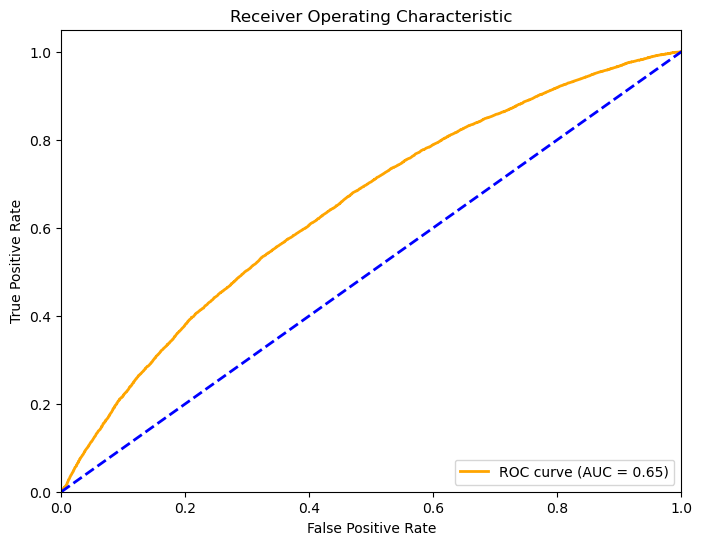

In [210]:
# Step 5: plot ROC curve

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Get the false positive rate, true positive rate, and thresholds
fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='orange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')  # Diagonal line (random classifier)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

In [212]:
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from statsmodels.tools import add_constant

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Train logistic regression on the resampled data
log_reg_model = LogisticRegression(max_iter=1000)
log_reg_model.fit(X_train_resampled, y_train_resampled)

# Add constant term (intercept) for statsmodels
X_train_resampled_with_const = add_constant(X_train_resampled)

# Use statsmodels for detailed results (logistic regression)
import statsmodels.api as sm
smote_logit_model = sm.Logit(y_train_resampled, X_train_resampled_with_const)
smote_logit_result = smote_logit_model.fit()

# Print the summary of the model
print(smote_logit_result.summary())

Optimization terminated successfully.
         Current function value: 0.658501
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:        Weapon Category   No. Observations:               144260
Model:                          Logit   Df Residuals:                   144244
Method:                           MLE   Df Model:                           15
Date:                Tue, 10 Dec 2024   Pseudo R-squ.:                 0.04998
Time:                        18:23:25   Log-Likelihood:                -94995.
converged:                       True   LL-Null:                       -99993.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                               -1.5442      0.036    -43.35

Here is an interpretation of the results from your logistic regression model applied to the resampled data using SMOTE:

Key Metrics:
Pseudo R-squared: 0.04998
This is a measure of the model's goodness of fit. The value suggests that the model explains only about 5% of the variance in the target variable (Weapon Category). While not a very high value, this is typical for many classification tasks, especially those involving complex relationships.
Log-Likelihood: -94995
This value measures the log of the likelihood of the data given the model parameters. A lower log-likelihood generally indicates a worse fit to the data. In comparison to the null model (Log-Likelihood = -99993), the model has improved fit.
LLR (Likelihood Ratio) p-value: 0.000
This value tests the null hypothesis that all coefficients are zero (no effect). A very small p-value (0.000) means that we can reject the null hypothesis, indicating that at least one of the predictors is statistically significant.
Coefficients:
Each feature has a corresponding coefficient, standard error, z-statistic, and p-value. Here is how you interpret these:

Coefficient (coef): Represents the change in the log-odds of the target variable (Weapon Category being a firearm) for a one-unit change in the feature. For example:
Victim Sex_Male has a coefficient of 0.6869. This suggests that, holding other factors constant, being male increases the log-odds of the weapon being a firearm by about 0.69 compared to the reference category (Female).
Region_Northeast has a coefficient of -0.4019, meaning that, compared to the reference category (Other regions), being in the Northeast decreases the log-odds of the weapon being a firearm by 0.40.
Standard error (std err): Represents the variability of the coefficient estimate. Smaller values indicate more precise estimates.
z-value: The z-statistic is the coefficient divided by its standard error. It tells you how many standard deviations the coefficient is away from zero.
p-value (P>|z|): A low p-value (typically < 0.05) indicates that the feature is statistically significant in predicting the target variable. For example:
Victim Sex_Male, Perpetrator Sex_Male, and Victim Age Scaled all have p-values of 0.000, indicating that these features are highly significant.
Season_Spring and Season_Summer have higher p-values (0.675 and 0.066, respectively), suggesting they are less significant predictors.
Confidence Intervals:
The confidence intervals ([0.025, 0.975]) provide a range in which the true value of the coefficient is likely to lie with 95% confidence. For example:

The coefficient for Victim Sex_Male is 0.6869, with a confidence interval of [0.658, 0.716], indicating we are 95% confident that the true coefficient lies within this range.
Important Features:
Victim Sex_Male: This feature is highly significant (p-value = 0.000) and has a positive coefficient, meaning that male victims are more likely to be associated with firearms.
Perpetrator Sex_Male: Similar to Victim Sex_Male, this is highly significant and positively associated with firearms.
Relationship Category_Stranger: This feature has a very high z-value and is significant, suggesting that the relationship between the victim and perpetrator being "Stranger" increases the likelihood of a firearm being involved.
Victim Age Scaled: This has a negative coefficient, meaning that as the victim's age increases, the likelihood of the weapon being a firearm decreases, all else being equal.
Features with Insignificant Effects:
Season_Spring and Season_Summer: These have higher p-values (above the typical significance threshold of 0.05), suggesting they are not significant in predicting whether the weapon is a firearm.
In conclusion:

Victim and Perpetrator Sex are significant predictors, indicating that gender plays a role in whether a weapon is a firearm.
Relationship Category (Stranger) also has a strong influence, with strangers being more likely to use firearms.
Victim Age is a significant predictor but with a negative association to firearms, suggesting younger victims may be associated with firearm incidents more than older victims.
The seasonality of the incident (spring, summer) does not appear to significantly impact the use of firearms based on this model.